In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('/home/puskchan/ML_projects/Recommender_systems/Beginner_project/Online Retail.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Observations:
- Quantity and UnitPrice have negative values (might be a mistake). Both of them also have some outliers.
- Missing values in CustomerID (almost 100k - can't impute, unique identifier, must be removed)

In [6]:
df.describe(include=['object'])

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,31/10/11 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


Observations:
- Missing values in Description
- 38 countries but UK dominates almost 490k times

In [7]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
stockcode_to_description = df.dropna(subset=['Description']).groupby('StockCode')['Description'].first().to_dict()

stockcode_to_description

{'10002': 'INFLATABLE POLITICAL GLOBE ',
 '10080': 'GROOVY CACTUS INFLATABLE',
 '10120': 'DOGGY RUBBER',
 '10123C': 'HEARTS WRAPPING TAPE ',
 '10124A': 'SPOTS ON RED BOOKCOVER TAPE',
 '10124G': 'ARMY CAMO BOOKCOVER TAPE',
 '10125': 'MINI FUNKY DESIGN TAPES',
 '10133': 'COLOURING PENCILS BROWN TUBE',
 '10135': 'COLOURING PENCILS BROWN TUBE',
 '11001': 'ASSTD DESIGN RACING CAR PEN',
 '15030': 'FAN BLACK FRAME ',
 '15034': 'PAPER POCKET TRAVELING FAN ',
 '15036': 'ASSORTED COLOURS SILK FAN',
 '15039': 'SANDALWOOD FAN',
 '15044A': 'PINK PAPER PARASOL ',
 '15044B': 'BLUE PAPER PARASOL ',
 '15044C': 'PURPLE PAPER PARASOL',
 '15044D': 'RED PAPER PARASOL',
 '15056BL': 'EDWARDIAN PARASOL BLACK',
 '15056N': 'EDWARDIAN PARASOL NATURAL',
 '15056P': 'EDWARDIAN PARASOL PINK',
 '15056bl': 'EDWARDIAN PARASOL BLACK',
 '15056n': 'EDWARDIAN PARASOL NATURAL',
 '15056p': 'EDWARDIAN PARASOL PINK',
 '15058A': 'BLUE POLKADOT GARDEN PARASOL',
 '15058B': 'PINK POLKADOT GARDEN PARASOL',
 '15058C': 'ICE CREAM DES

In [9]:
df['Description'] = df['Description'].fillna(df['StockCode'].map(stockcode_to_description))

In [10]:
missing_description_after = df['Description'].isnull().sum()
missing_description_after

np.int64(112)

In [11]:
df['Description'] = df['Description'].fillna('UNKNOWN')

In [12]:
df['CustomerID'] = df['CustomerID'].fillna('Nil')

In [13]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(5268)

In [15]:
df[df.duplicated()].head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,01/12/10 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,01/12/10 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,01/12/10 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,01/12/10 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,01/12/10 11:49,2.95,17920.0,United Kingdom
587,536412,22273,FELTCRAFT DOLL MOLLY,1,01/12/10 11:49,2.95,17920.0,United Kingdom
589,536412,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,1,01/12/10 11:49,3.75,17920.0,United Kingdom
594,536412,22141,CHRISTMAS CRAFT TREE TOP ANGEL,1,01/12/10 11:49,2.10,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,01/12/10 11:49,1.65,17920.0,United Kingdom
600,536412,22569,FELTCRAFT CUSHION BUTTERFLY,2,01/12/10 11:49,3.75,17920.0,United Kingdom


In [16]:
df.drop_duplicates(keep='first', inplace=True)

In [17]:
n_quantity = df[df['Quantity'] < 0].shape[0]
n_price = df[df['UnitPrice'] <= 0].shape[0]

n_quantity, n_price

(10587, 2512)

Text(0.5, 1.0, 'UnitPrice')

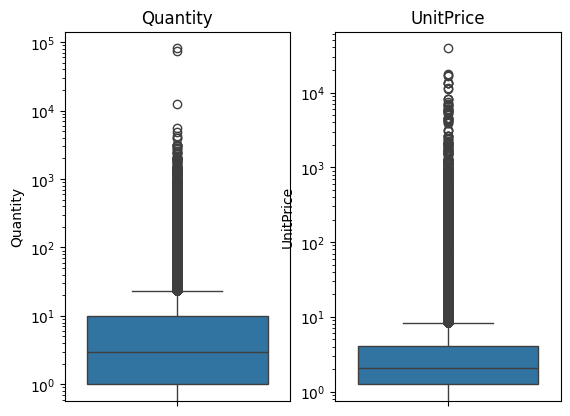

In [18]:
plt.subplot(1,2,1)
sns.boxplot(y=df['Quantity'])
plt.yscale('log')
plt.title('Quantity')

plt.subplot(1,2,2)
sns.boxplot(y=df['UnitPrice'])
plt.yscale('log')
plt.title('UnitPrice')

In [19]:
df['Quantity']

0          6
1          6
2          8
3          6
4          6
          ..
541904    12
541905     6
541906     4
541907     4
541908     3
Name: Quantity, Length: 536641, dtype: int64

In [20]:
df.drop(df[df['UnitPrice'] < 0].index, inplace=True)

In [21]:
# This does not work as the values are unique
stockcode_to_unitprice = df[df['UnitPrice'] > 0].groupby('StockCode')['UnitPrice'].median().to_dict()

def fill_unitprice(row):
    if row['UnitPrice'] == 0 and row['StockCode'] in stockcode_to_unitprice:
        return stockcode_to_unitprice[row['StockCode']]
    return row['UnitPrice']

df['UnitPrice'] = df.apply(fill_unitprice, axis=1)


In [22]:
n_price = df[df['UnitPrice'] <= 0].shape[0]

n_price

134

In [23]:
df = df[df['UnitPrice']>0]

In [24]:
df[df['Quantity'] > 0]['InvoiceNo'].unique()

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      shape=(20708,), dtype=object)

In [25]:
df[df['Quantity'] <= 0]['InvoiceNo'].unique()

array(['C536379', 'C536383', 'C536391', ..., 'C581499', 'C581568',
       'C581569'], shape=(5057,), dtype=object)

Notice the 'C' in invoice no, it only comes for negative quantities. Might be cancelled products. But the max value being -80k. So it can be an outlier.

In [26]:
k = df[df['Quantity'] > df['Quantity'].quantile(0.99)]['Quantity'].unique()
sorted(k)[280:]

[np.int64(3000),
 np.int64(3100),
 np.int64(3114),
 np.int64(3186),
 np.int64(3906),
 np.int64(4000),
 np.int64(4300),
 np.int64(4800),
 np.int64(5568),
 np.int64(12540),
 np.int64(74215),
 np.int64(80995)]

In [27]:
df = df[(df['Quantity'] < 6000)]

In [28]:
df = df[df['Quantity'] > -6000]

In [29]:
df['Quantity']

0          6
1          6
2          8
3          6
4          6
          ..
541904    12
541905     6
541906     4
541907     4
541908     3
Name: Quantity, Length: 536496, dtype: int64

In [30]:
k = df[df['UnitPrice'] > df['UnitPrice'].quantile(0.99)]['UnitPrice'].unique()
sorted(k)[1080::]

[np.float64(8142.75),
 np.float64(8286.22),
 np.float64(11062.06),
 np.float64(11586.5),
 np.float64(13474.79),
 np.float64(13541.33),
 np.float64(16453.71),
 np.float64(16888.02),
 np.float64(17836.46),
 np.float64(38970.0)]

In [31]:
df = df[(df['UnitPrice'] < 18000)]

In [32]:
df['CustomerID'] = df['CustomerID'].astype(str)

In [33]:
df.describe()

,Quantity,UnitPrice
count,536495.000000,536495.000000
mean,9.706564,4.620667
std,44.520375,78.553345
min,-4830.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.130000
max,5568.000000,17836.460000


In [34]:
df.describe(include=['O'])

,InvoiceNo,StockCode,Description,InvoiceDate,CustomerID,Country
count,536495,536495,536495,536495,536495,536495
unique,25755,3937,4213,23191,4371,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,31/10/11 14:41,Nil,United Kingdom
freq,1114,2301,2357,1114,134898,490154


In [35]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

/tmp/ipykernel_5273/3633860036.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [36]:
unique_values = {
    "StockCode": df["StockCode"].nunique(),
    "Description": df["Description"].nunique(),
    "CustomerID": df["CustomerID"].nunique(),
    "Country": df["Country"].nunique(),
}

In [37]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalSales'].sum()

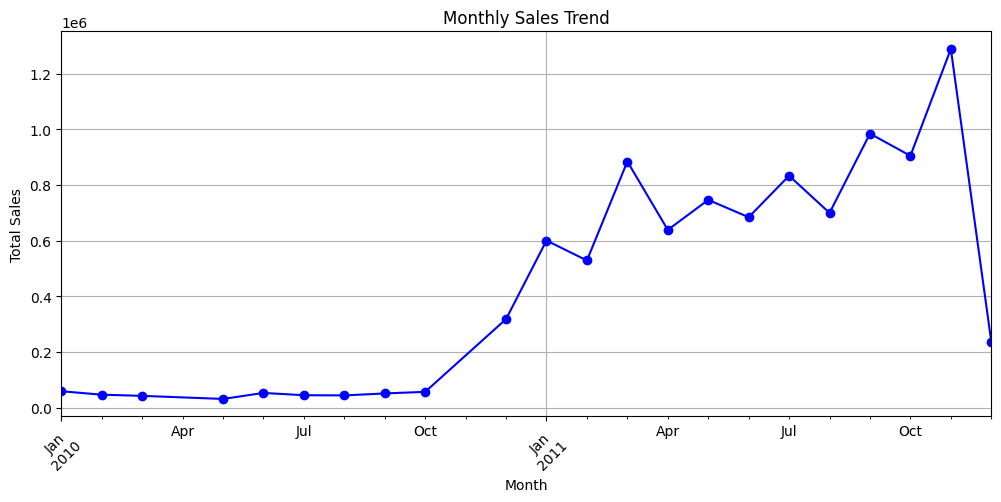

In [38]:
plt.figure(figsize=(12, 5))
monthly_sales.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [39]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

top_products

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53751
JUMBO BAG RED RETROSPOT               47260
POPCORN HOLDER                        36322
ASSORTED COLOUR BIRD ORNAMENT         36282
PACK OF 72 RETROSPOT CAKE CASES       36016
WHITE HANGING HEART T-LIGHT HOLDER    35298
RABBIT NIGHT LIGHT                    30963
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26299
PACK OF 60 PINK PAISLEY CAKE CASES    24719
Name: Quantity, dtype: int64

In [40]:
customer_purchases = df.groupby('CustomerID')['InvoiceNo'].nunique()
customer_purchases.sort_values().tail()

CustomerID
14606.0     128
17841.0     169
12748.0     224
14911.0     248
Nil        3572
Name: InvoiceNo, dtype: int64

In [41]:
country_sales = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)
country_sales.head()

Country
United Kingdom    8209351.225
Netherlands        285495.300
EIRE               263739.480
Germany            221526.575
France             197326.265
Name: TotalSales, dtype: float64

In [109]:
popular_items = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)
popular_items.head()

StockCode
22197     56427
84077     53751
85099B    47260
85123A    38811
84879     36122
Name: Quantity, dtype: int64

In [45]:
popular_items_monthly = df.groupby(['Month', 'StockCode'])['Quantity'].sum().sort_values(ascending=False).head(10)
popular_items_monthly

Month    StockCode
2011-11  23084        10751
         22197         9415
2011-04  84077         8818
2011-05  22197         7086
2011-10  84077         6951
2011-11  85123A        6840
2011-10  23084         6364
2011-09  85123A        6343
2011-10  22197         5865
2011-01  37413         5582
Name: Quantity, dtype: int64

In [92]:
ppi = df.groupby('CustomerID').apply(lambda x: dict(zip(x['StockCode'], x['Quantity'])))

/tmp/ipykernel_5273/1187865634.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ppi = df.groupby('CustomerID').apply(lambda x: dict(zip(x['StockCode'], x['Quantity'])))


In [94]:
ppi.drop('Nil', inplace=True)

In [95]:
ppi

CustomerID
12347.0    {'85116': 6, '22375': 8, '71477': 12, '22492':...
12348.0    {'84992': 72, '22951': 72, '84991': 120, '2121...
12349.0    {'23112': 2, '23460': 2, '21564': 6, '21411': ...
12350.0    {'21908': 12, '22412': 12, '79066K': 10, '7919...
12352.0    {'21380': 6, '22064': 12, '21232': 12, '22646'...
                                 ...                        
18280.0    {'82484': 3, '22180': 2, '22467': 6, '22725': ...
18281.0    {'22037': 12, '22716': 12, '22028': 12, '23007...
18282.0    {'21270': 1, '23187': -5, '23295': 8, '22089':...
18283.0    {'22356': 3, '20726': 3, '22384': 3, '22386': ...
18287.0    {'22755': 12, '22754': 12, '22753': 12, '22756...
Length: 4370, dtype: object

In [96]:
previous_purchase = ppi.to_dict()

In [106]:
for customer, items in previous_purchase.items():
    previous_purchase[customer] = dict(sorted(items.items(), key=lambda x: x[1], reverse=True))

In [107]:
previous_purchase

{'12347.0': {'23076': 240,
  '22492': 36,
  '84558A': 36,
  '17021': 36,
  '85167B': 30,
  '22195': 24,
  '21064': 24,
  '21731': 24,
  '84625A': 24,
  '84625C': 24,
  '22196': 24,
  '84992': 24,
  '84991': 24,
  '21976': 24,
  '22417': 24,
  '21975': 24,
  '16008': 24,
  '23084': 24,
  '23308': 24,
  '23508': 20,
  '23506': 20,
  '22699': 18,
  '23297': 16,
  '23271': 16,
  '71477': 12,
  '22771': 12,
  '22772': 12,
  '22773': 12,
  '22774': 12,
  '22775': 12,
  '22805': 12,
  '22727': 12,
  '21171': 12,
  '22494': 12,
  '20780': 12,
  '22134': 12,
  '21832': 12,
  '22422': 12,
  '22371': 12,
  '21791': 12,
  '84559A': 12,
  '84559B': 12,
  '22821': 12,
  '23171': 12,
  '23172': 12,
  '23170': 12,
  '85178': 12,
  '51014C': 12,
  '23147': 12,
  '22992': 12,
  '23316': 12,
  '23480': 12,
  '21265': 12,
  '21636': 12,
  '22252': 12,
  '22945': 12,
  '22698': 12,
  '22697': 12,
  '23503': 12,
  '22561': 12,
  '22621': 12,
  '23421': 12,
  '23422': 12,
  '23420': 12,
  '23497': 12,
  '207

In [112]:
stockcode_to_description = df[['StockCode', 'Description']].drop_duplicates().set_index('StockCode')['Description'].to_dict()

In [113]:
def recommended_products(customer_id, n=5):
    if customer_id not in previous_purchase:
        recc_prod =  popular_items.head(n).index.tolist()
    recc_prod = list(previous_purchase[customer_id].keys())[:n]
    recommended_descriptions = [stockcode_to_description.get(code, "Unknown Product") for code in recc_prod]
    return recommended_descriptions


In [116]:
recommended_products('13563.0')

['RED HANGING HEART T-LIGHT HOLDER',
 'SILVER FABRIC MIRROR',
 'JAZZ HEARTS ADDRESS BOOK',
 'JUMBO BAG RED RETROSPOT',
 'SINGLE HEART ZINC T-LIGHT HOLDER']